In [7]:
from pylab import *
%matplotlib inline
import random

# 1

Queremos encontrar las raíces de 

$$
f(x) = cos(x) + 1.2 sin(x^2)
$$

Para lo cual primero haremos una función que nos de n números aleatorios entre $t_1$ y $t_2$ y nos los organize de menor a mayor.

In [2]:
def rand(n,t):
    rand = zeros(n+1)
    for i in arange(n):
        rand[i] = array([random.uniform(t[0],t[1])])
    rand = sorted(rand)
    rand[0]=t[0]
    rand[n]=t[1]
    return rand

Luego usaremos el método de bipartición:

In [3]:
def raiz_bip(func,x_i,x_d,err=1e-5):
    raiz = 0.5*(x_i+x_d)
    y_i,y_d = func(x_i),func(x_d)
    while abs(raiz - x_d) >= err and abs(y_i - y_d) >= err:
        y_m = func(raiz)
        if y_m == 0.:
            print "chin, le atine :D"
            break
        if y_m*y_i<0:
            x_d = raiz
        else:
            x_i = raiz
        raiz = 0.5*(x_i+x_d)
        y_i,y_d = func(x_i),func(x_d)

    return raiz

Y con éste haremos una función que haga el método de bipartición siempre que la función evaluada en dos números aleatorios consecutivos cambie de signo.

In [14]:
def bip_a2(ec,t,p,err=1e-5):
    #partición aleatoria del dominio
    raiz = zeros(p)
    parti = rand(p,t)
    n=0
    for i in (arange(p)):
        if ec(parti[i])*ec(parti[i+1]) < 0:
            raiz[i] = raiz_bip(ec,parti[i],parti[i+1])
            n = n + 1
    raiz = raiz[raiz !=0]  
    print n #número de raíces

    return raiz

In [34]:
def ec1(x):
    return cos(x)+(1.2)*sin(x*x)

Vemos que haciendo 50 particiones nos da 8 raíces

In [37]:
raiz = bip_a2(ec1,[0,2*pi],50)
print raiz

8
[ 1.73377532  2.66808981  2.91173923  4.37378922  4.68723772  4.99020597
  5.36717537  5.54539482]


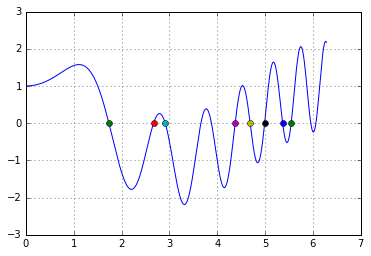

In [38]:
x=linspace(0,2*pi,20000)
plot(x,ec1(x))
grid(True)
for i in arange(len(raiz)):
    plot(raiz[i],0,'o')

show()

En cambio, si se hacen 1000 ó 2000 salen 12, con lo cual vemos que ya llegamos al máximo.

In [46]:
raiz = bip_a2(ec1,[0,2*pi],1000)

12


In [47]:
raiz = bip_a2(ec1,[0,2*pi],2000)

12


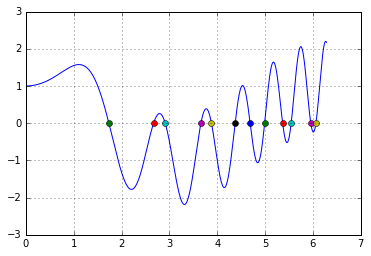

In [48]:
x=linspace(0,2*pi,20000)
plot(x,ec1(x))
grid(True)
for i in arange(len(raiz)):
    plot(raiz[i],0,'o')

show()

# 2

Ahora encontraremos las raíces de la ecuación 

$$
f(x,y) = 2 e^{-(x+1)^2} (e^{-(y+2)^2} + e^{-(y-2)^2}) + 6x(x^2 + y^2)e^{-(x^2 + y^2)} - 1 
$$

In [49]:
def ec2(x,y):
    return 2*exp((-1)*((x+1)**2))*((exp((-1)*((y+2)**2))) + exp((-1)*((y-2)**2))) + 6*x*(x**2+y**2)*exp((-1)*(x**2+y**2)) - 1

Y haremos una función que hace una partición en x, y para cada x encuentra las raíces.

In [51]:
def bip_a23(ec,t2,p,err=1e-5):
    x = linspace(t2[0],t2[1],p)
    raiz = zeros([p*p,2])
    for n in arange(len(x)):
        def ecb(y):
            return ec(x[n],y)
        y = rand(p,t2)
        for i in (arange(p)):
            if ecb(y[i])*ecb(y[i+1]) < 0:
                raizy = raiz_bip(ecb,y[i],y[i+1])
                raiz[i+n*p,:] = [x[n],raizy]
    raiz = raiz[raiz[:,1] !=0]      
    return raiz

In [126]:
raiz = bip_a23(ec2,[-4,4,-4,4],300)
#print raiz

Al plotear sale una carita feliz! :D

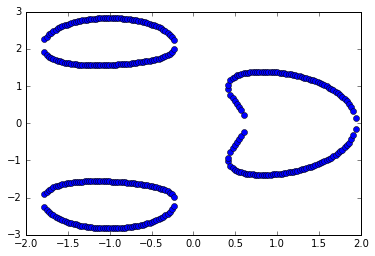

In [129]:
plot(raiz[:,0],raiz[:,1],'o')

# 3

Usando las siguientes ecuaciones de movimiento para un tiro parabólico, encontraremos la trayectoria de una pelota que rebota sobre un plano inclinado. 

In [2]:
def e_mov(r_v,t,fric=0,g=9.8,m=1):
    u = sqrt(r_v[2]**2 + r_v[3]**2)
    dx = r_v[2] 
    dy = r_v[3]
    
    if fric==0:
        dvx,dvy = 0, -(g/m)
        
    else:
        dvx = -  fric([r_v[2],r_v[3]])[0] #nuestro modelo de fricción sólo depende de la velocidad 
        dvy = -(g/m) - fric([r_v[2],r_v[3]])[1]

    
    return array([dx,dy,dvx,dvy])


Usaremos también las fricciones v (lineal con respecto a la velocidad) y v2 (cuadrada con respecto a la velocidad)

In [3]:
def fric_v(v,gamma=0.1):
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y])

def fric_v2(v,gamma=0.1):
    norm_v = sqrt(v[0]**2 + v[1]**2)
    f_x = gamma*norm_v*v[0]
    f_y= gamma*norm_v*v[1]
    return array([f_x,f_y])

In [4]:
def rk4_a(ec,p_ini,x,args=0,h=0.0001):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)

    return tiempos,sol

La función tiro hace lo mismo que la vista en clase, pero toma el cambio de signo cuando la partícula atraviesa la recta con inclinación deseada. Además de esto, se rotó el vector de la velocidad de rebote para un plano horizontal los grados del plano nuevo para encontrar la nueva velocidad final. 

In [5]:
def tiro(p,N,ang,fric):

    pend = tan(ang)
    trayectoria = zeros((N,len(p)))
    mi_dt = .1
    trayectoria[0,:] = array(p)
    for i in range(N-1):
        t,sol_dt = rk4_a(e_mov,trayectoria[i,:],[0,mi_dt],fric)
        if (sol_dt[-1,:][1] + pend*sol_dt[-1,:][0]) < 0:
            #print "buscando punto de rebote"
            dt_busqueda = mi_dt/2
            y_izq = trayectoria[i,:]
            t,sol = rk4_a(e_mov,trayectoria[i,:],[0,dt_busqueda],fric)
            y_med = sol[-1,:]
            while abs(y_izq[1] + pend*y_izq[0]) > 1e-1:
                if (y_izq[1] + pend*y_izq[0])*(y_med[1] + pend*y_izq[0]) < 0:
                    reinicio = y_izq
                else:
                    reinicio = y_med
                dt_busqueda = dt_busqueda/2
                t,sol = rk4_a(e_mov,reinicio,[0,dt_busqueda],fric)
                y_izq = reinicio
                y_med = sol[-1,:]
            y_izq = array([y_izq[0],y_izq[1],(y_izq[2]*cos(ang)-y_izq[3]*sin(ang)),(-y_izq[2]*sin(ang)-y_izq[3]*cos(ang))])
            trayectoria[i+1,:] = y_izq    
        else:
            trayectoria[i+1,:] = sol_dt[-1,:]

    return trayectoria


Las siguientes tres gráficas muestran la trayectoria para planos con inclinación 15°, 30° y 45° primero con fricción lineal y luego con fricción cuadrática.

# 15° v

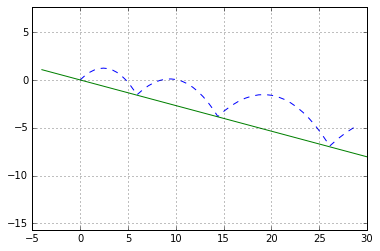

In [8]:
trayectoria = tiro([0,0,5,5],50,pi/12,fric_v)

plot(trayectoria[:,0],trayectoria[:,1],'--')
x = linspace(-4,30)
plot(x,-tan(pi/12)*x)
plt.axis('equal')
grid(True)

# 15° v^2

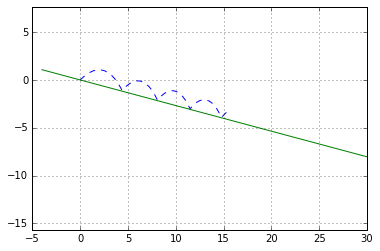

In [69]:
trayectoria = tiro([0,0,5,5],50,pi/12,fric_v2)

plot(trayectoria[:,0],trayectoria[:,1],'--')
x = linspace(-4,30)
plot(x,-tan(pi/12)*x)
plt.axis('equal')
grid(True)

# 30° v

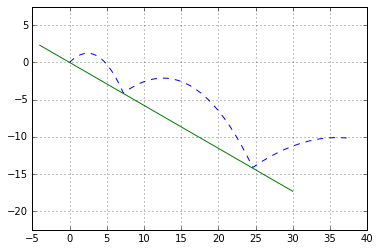

In [67]:
trayectoria = tiro([0,0,5,5],50,pi/6,fric_v)

plot(trayectoria[:,0],trayectoria[:,1],'--')
x = linspace(-4,30)
plot(x,-tan(pi/6)*x)
plt.axis('equal')
grid(True)

# 30° v^2

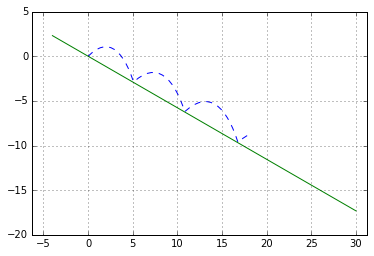

In [70]:
trayectoria = tiro([0,0,5,5],50,pi/6,fric_v2)

plot(trayectoria[:,0],trayectoria[:,1],'--')
x = linspace(-4,30)
plot(x,-tan(pi/6)*x)
plt.axis('equal')
grid(True)

# 45° v

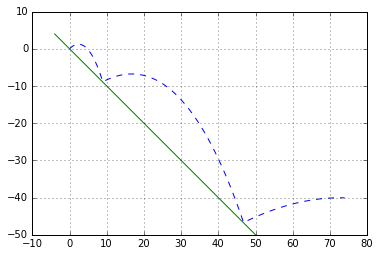

In [68]:
trayectoria = tiro([0,0,5,5],70,pi/4,fric_v)

plot(trayectoria[:,0],trayectoria[:,1],'--')
x = linspace(-4,50)
plot(x,-tan(pi/4)*x)
plt.axis('equal')
grid(True)

# 45° v^2

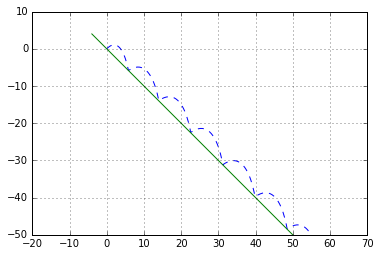

In [72]:
trayectoria = tiro([0,0,5,5],140,pi/4,fric_v2)

plot(trayectoria[:,0],trayectoria[:,1],'--')
x = linspace(-4,50)
plot(x,-tan(pi/4)*x)
plt.axis('equal')
grid(True)

Las siguientes tres gráficas son lo mismo a lo anterior, sólo que con una velocidad inicial hacia atrás, teniendo cuidado que tenga una pendiente mayor a la del plano. Vemos que van hacia atrás, se van haciendo más chicas las parábolas, y eventualmente regresan a caer hacia la derecha. 

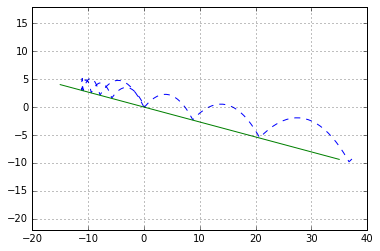

In [75]:
trayectoria = tiro([0,0,-5,10],150,pi/12,fric_v)

plot(trayectoria[:,0],trayectoria[:,1],'--')
x = linspace(-15,35)
plot(x,-tan(pi/12)*x)
plt.axis('equal')
grid(True)

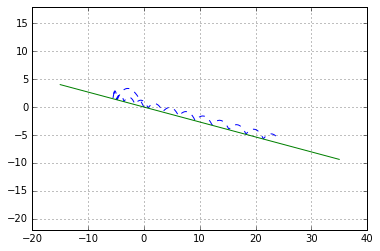

In [81]:
trayectoria = tiro([0,0,-5,10],150,pi/12,fric_v2)

plot(trayectoria[:,0],trayectoria[:,1],'--')
x = linspace(-15,35)
plot(x,-tan(pi/12)*x)
plt.axis('equal')
grid(True)

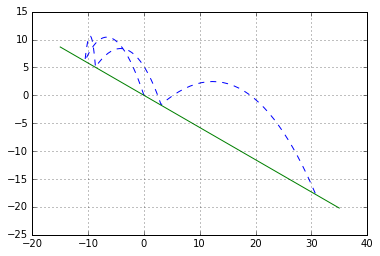

In [85]:
trayectoria = tiro([0,0,-5,15],100,pi/6,fric_v)

plot(trayectoria[:,0],trayectoria[:,1],'--')
x = linspace(-15,35)
plot(x,-tan(pi/6)*x)
plt.axis('equal')
grid(True)

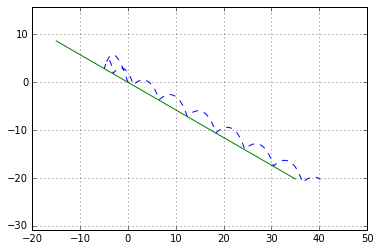

In [86]:
trayectoria = tiro([0,0,-5,15],150,pi/6,fric_v2)

plot(trayectoria[:,0],trayectoria[:,1],'--')
x = linspace(-15,35)
plot(x,-tan(pi/6)*x)
plt.axis('equal')
grid(True)

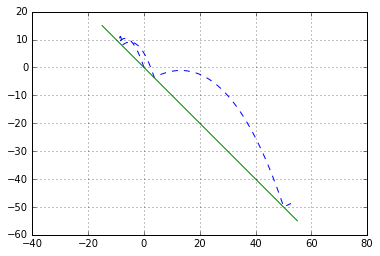

In [89]:
trayectoria = tiro([0,0,-5,15],100,pi/4,fric_v)

plot(trayectoria[:,0],trayectoria[:,1],'--')
x = linspace(-15,55)
plot(x,-tan(pi/4)*x)
plt.axis('equal')
grid(True)

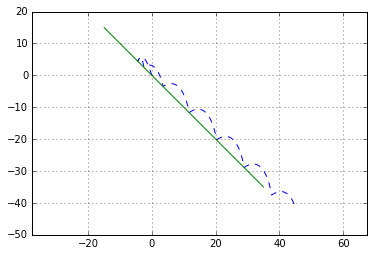

In [90]:
trayectoria = tiro([0,0,-5,15],150,pi/4,fric_v2)

plot(trayectoria[:,0],trayectoria[:,1],'--')
x = linspace(-15,35)
plot(x,-tan(pi/4)*x)
plt.axis('equal')
grid(True)